In [2]:
import numpy as np
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

In [4]:
iris_X = iris.data

In [5]:
iris_y = iris.target

In [6]:
np.unique(iris_y)

array([0, 1, 2])

In [7]:
#split iris data into train and test dataset
#a random permutation, to split the data randomly
np.random.seed(0)
indices = np.random.permutation(len(iris_X))
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test = iris_X[indices[-10:]]
iris_y_test = iris_y[indices[-10:]]

In [8]:
# Create and fit a k-nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [9]:
#evaluate model on test instances and compute test error
from sklearn.metrics import accuracy_score
y_prediction = knn.predict(iris_X_test)
y_prediction

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [10]:
accuracy_score(iris_y_test, y_prediction)

0.90000000000000002

In [11]:
#test the value of k [1-20]
accuracies = []
for k in range(1,21):
    #fiting the KNN classifier
    knn.set_params(n_neighbors=k).fit(iris_X_train,iris_y_train)
    acc = accuracy_score(iris_y_test, knn.predict(iris_X_test))
    accuracies.append(acc)
#print the best k 
print('accuracies'+ str({k:v for k,v in zip(range(1,21),accuracies)})+'\n')
max_acc =  max(accuracies)
best_K = accuracies.index(max_acc) + 1
print('best accuracy is '+str(max_acc)+'\n')
print('the best K is ' + str(best_K)+'\n')

# choosing the best knn
knn.set_params(n_neighbors=best_K).fit(iris_X_train,iris_y_train)
    

accuracies{1: 0.90000000000000002, 2: 0.90000000000000002, 3: 0.90000000000000002, 4: 0.90000000000000002, 5: 0.90000000000000002, 6: 0.90000000000000002, 7: 0.90000000000000002, 8: 1.0, 9: 1.0, 10: 1.0, 11: 1.0, 12: 1.0, 13: 0.90000000000000002, 14: 1.0, 15: 0.90000000000000002, 16: 1.0, 17: 1.0, 18: 1.0, 19: 1.0, 20: 1.0}

best accuracy is 1.0

the best K is 8



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

# Lab Assignment

In [12]:
# KNN with cross validation in all the dataset

from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score


In [19]:
# shuffeling the input
X, y = shuffle(iris_X,iris_y, random_state=0)
CV = 10 # always use a 10-fold cross validation

## KNN Results

In [16]:
knn = KNeighborsClassifier()
# use 10-fold cross validation: 90% train and 10% test
knn_accuracies = cross_val_score(knn,X,y,cv=CV)
print('accuracies for 10-fold cross validation using 5NN')
print(knn_accuracies)
knn_mean_accuracy = np.mean(knn_accuracies)
print('mean accuracy for KNN is '+ str(knn_mean_accuracy))

accuracies for 10-fold cross validation using 5NN
[ 1.          1.          0.93333333  0.86666667  1.          1.          1.
  1.          0.93333333  0.93333333]
mean accuracy for KNN is 0.966666666667


## SVM Results

In [20]:
from sklearn.svm import SVC
svm = SVC()
svm_accuracies = cross_val_score(svm, X,y, cv=CV)
print('accuracies for 10-fold cross validation using SVM')
print(svm_accuracies)
svm_mean_accuracy = np.mean(svm_accuracies)
print('mean accuracy for SVM is '+ str(svm_mean_accuracy))

accuracies for 10-fold cross validation using SVM
[ 1.          1.          1.          0.93333333  1.          1.          1.
  1.          0.93333333  0.93333333]
mean accuracy for SVM is 0.98


## Logistic Regression Results

In [21]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
logistic_regression_accuracies = cross_val_score(logistic_regression, X,y,cv=CV)
print('accuracies for 10-fold cross validation using Logistic Regression')
print(logistic_regression_accuracies)
logistic_regression_mean_accuracy = np.mean(logistic_regression_accuracies)
print('mean accuracy for Logistic Regression is '+ str(logistic_regression_mean_accuracy))

accuracies for 10-fold cross validation using Logistic Regression
[ 1.          1.          0.86666667  0.93333333  0.93333333  1.          1.
  0.93333333  1.          0.93333333]
mean accuracy for Logistic Regression is 0.96


## Comparing the classifiers

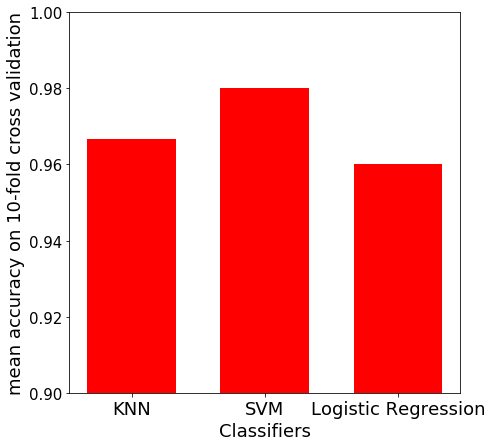

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

######## parameters of the plot #####
bar_width = 1/1.5 #for the bar plot
plt.rcParams['figure.figsize'] = (7,7)
plt.rcParams['xtick.labelsize']=18
plt.rcParams['axes.labelsize']=18
plt.rcParams['ytick.labelsize']=15
########                        #####

y = [knn_mean_accuracy, svm_mean_accuracy, logistic_regression_mean_accuracy]
x = list(range(0,3))
x_labels = ['KNN', 'SVM', 'Logistic Regression']


plt.bar(x,y,bar_width, color='red')
plt.ylim(ymin=0.9, ymax=1)
plt.xticks(x,x_labels)
plt.xlabel('Classifiers')
plt.ylabel('mean accuracy on 10-fold cross validation')


### The winner is ...

In [45]:
max_accuracy = max(y)
best_classifier = x_labels[y.index(max_accuracy)]

print('the best classifier is ' + best_classifier)
print('the accuracy (mean accuracy using 10-fold cross validation) obtained with it is '+ str(max_accuracy))

the best classifier is SVM
the accuracy (mean accuracy using 10-fold cross validation) obtained with it is 0.98
